In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
str = '2024-08-22 AM 12:00:20' # [오전] 을 [AM] 으로 바꿔야 함
time1 = datetime.strptime(str, '%Y-%m-%d %p %I:%M:%S')
print(time1)

2024-08-22 00:00:20


In [4]:
def parse_date(str):
    s = str.replace('오전', 'am')
    s = s.replace('오후', 'pm')
    return datetime.strptime(s, '%Y-%m-%d %p %I:%M:%S')

print(parse_date('2024-08-22 오전 12:00:20'))

2024-08-22 00:00:20


In [5]:
unit0 = pd.read_csv('./data/cheonan_unit_total_w1/cheonan_unit0_total.csv', encoding='euc-kr', parse_dates=['DATE'], date_parser=parse_date)
unit0 = unit0[['DATE', 'CO2', 'VOC', 'TEMP', 'HUMID', 'PARTICLE']]
unit0.sort_values('DATE', inplace=True)
print(unit0.head())
print(unit0.tail())

                 DATE  CO2  VOC  TEMP  HUMID  PARTICLE
0 2024-08-22 00:00:20  0.4    6  26.8   43.8         0
1 2024-08-22 00:01:14  0.4    6  26.8   43.8         0
2 2024-08-22 00:01:59  0.4    5  26.9   43.8         0
3 2024-08-22 00:02:54  0.4   10  26.8   43.8         0
4 2024-08-22 00:03:48  0.4    4  26.8   43.8         0
                     DATE   CO2  VOC  TEMP  HUMID  PARTICLE
10099 2024-08-28 10:41:00  0.49  214  26.8   43.6         0
10100 2024-08-28 10:41:54  0.48  220  26.8   43.5         0
10101 2024-08-28 10:42:48  0.54  223  26.8   43.5         0
10102 2024-08-28 10:43:43  0.49  224  26.8   43.5         0
10103 2024-08-28 10:44:38  0.49  224  26.8   43.5         0


In [24]:
unit0['d_truncated'] = unit0['DATE'].apply(lambda x: datetime(x.year, x.month, x.day))
print(unit0.head())
print(unit0.info())

                 DATE  CO2  VOC  TEMP  HUMID  PARTICLE d_truncated
0 2024-08-22 00:00:20  0.4    6  26.8   43.8         0  2024-08-22
1 2024-08-22 00:01:14  0.4    6  26.8   43.8         0  2024-08-22
2 2024-08-22 00:01:59  0.4    5  26.9   43.8         0  2024-08-22
3 2024-08-22 00:02:54  0.4   10  26.8   43.8         0  2024-08-22
4 2024-08-22 00:03:48  0.4    4  26.8   43.8         0  2024-08-22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10657 entries, 0 to 10103
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         10657 non-null  datetime64[ns]
 1   CO2          10657 non-null  float64       
 2   VOC          10657 non-null  int64         
 3   TEMP         10657 non-null  float64       
 4   HUMID        10657 non-null  float64       
 5   PARTICLE     10657 non-null  int64         
 6   d_truncated  10657 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2)
m

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc422a65280>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc422a65940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc422966ee0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc422a59040>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc422a593a0>,
 'means': []}

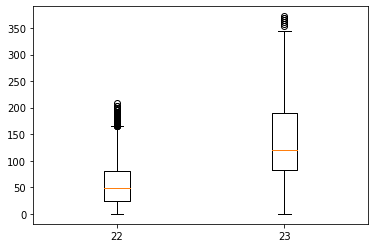

In [7]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot([
    unit0[unit0['d_truncated'] == '2024-08-22']['VOC'],
    unit0[unit0['d_truncated'] == '2024-08-23']['VOC']],
    labels=['22', '23'])

<AxesSubplot:xlabel='d_truncated', ylabel='VOC'>

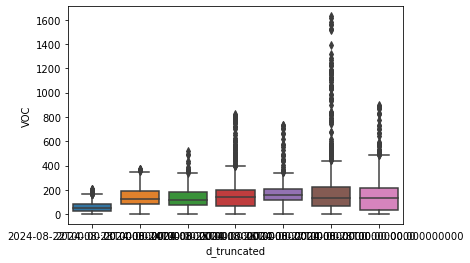

In [26]:
ax = plt.subplots()
sns.boxplot(x='d_truncated', y='VOC', data=unit0)

<AxesSubplot:xlabel='d_truncated', ylabel='VOC'>

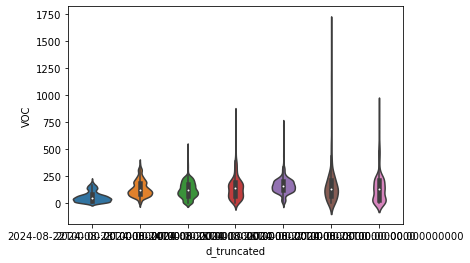

In [47]:
fig, ax = plt.subplots()
sns.violinplot(x='d_truncated', y='VOC', data=unit0, ax=ax)
# ax.xaxis.set_major_locator(mdates.YearLocator(base = 1, month = 1, day = 1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

In [21]:
print(unit0.groupby('d_truncated').size())
print(unit0[unit0['d_truncated'] == '2024-08-27'])

d_truncated
2024-08-22    1627
2024-08-23    1643
2024-08-24    1645
2024-08-25    1641
2024-08-26    1656
2024-08-27    1706
2024-08-28     739
dtype: int64
                    DATE   CO2  VOC  TEMP  HUMID  PARTICLE d_truncated
8212 2024-08-27 00:00:47  0.50  155  26.9   43.1         0  2024-08-27
8213 2024-08-27 00:01:33  0.50  154  26.9   43.2         0  2024-08-27
8214 2024-08-27 00:02:27  0.50  154  26.9   43.1         0  2024-08-27
8215 2024-08-27 00:03:22  0.50  149  26.9   43.2         0  2024-08-27
8216 2024-08-27 00:04:08  0.50  154  26.9   43.1         0  2024-08-27
...                  ...   ...  ...   ...    ...       ...         ...
9411 2024-08-27 23:56:22  0.41   85  26.8   43.1         0  2024-08-27
9412 2024-08-27 23:57:16  0.41   79  26.8   43.1         0  2024-08-27
9413 2024-08-27 23:58:02  0.40   84  26.8   43.1         0  2024-08-27
9414 2024-08-27 23:58:57  0.41   80  26.8   43.1         0  2024-08-27
9415 2024-08-27 23:59:43  0.41   77  26.8   43.1         0  2

In [22]:
unit0_d27 = unit0[unit0['d_truncated'] == '2024-08-27']
print(unit0_d27.head())
print(unit0_d27.tail())

                    DATE  CO2  VOC  TEMP  HUMID  PARTICLE d_truncated
8212 2024-08-27 00:00:47  0.5  155  26.9   43.1         0  2024-08-27
8213 2024-08-27 00:01:33  0.5  154  26.9   43.2         0  2024-08-27
8214 2024-08-27 00:02:27  0.5  154  26.9   43.1         0  2024-08-27
8215 2024-08-27 00:03:22  0.5  149  26.9   43.2         0  2024-08-27
8216 2024-08-27 00:04:08  0.5  154  26.9   43.1         0  2024-08-27
                    DATE   CO2  VOC  TEMP  HUMID  PARTICLE d_truncated
9411 2024-08-27 23:56:22  0.41   85  26.8   43.1         0  2024-08-27
9412 2024-08-27 23:57:16  0.41   79  26.8   43.1         0  2024-08-27
9413 2024-08-27 23:58:02  0.40   84  26.8   43.1         0  2024-08-27
9414 2024-08-27 23:58:57  0.41   80  26.8   43.1         0  2024-08-27
9415 2024-08-27 23:59:43  0.41   77  26.8   43.1         0  2024-08-27


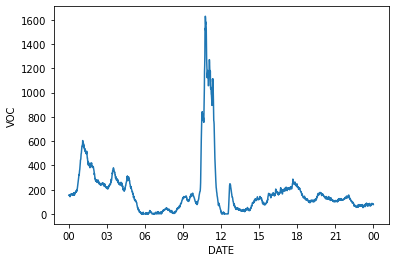

In [23]:
# ticks label - https://stackoverflow.com/questions/62473172/modifying-x-ticks-labels-in-seaborn

from matplotlib import dates

fig, ax = plt.subplots()
sns.lineplot(data=unit0_d27, x='DATE', y='VOC', ax=ax)
ax.xaxis.set_major_formatter(dates.DateFormatter("%H"))

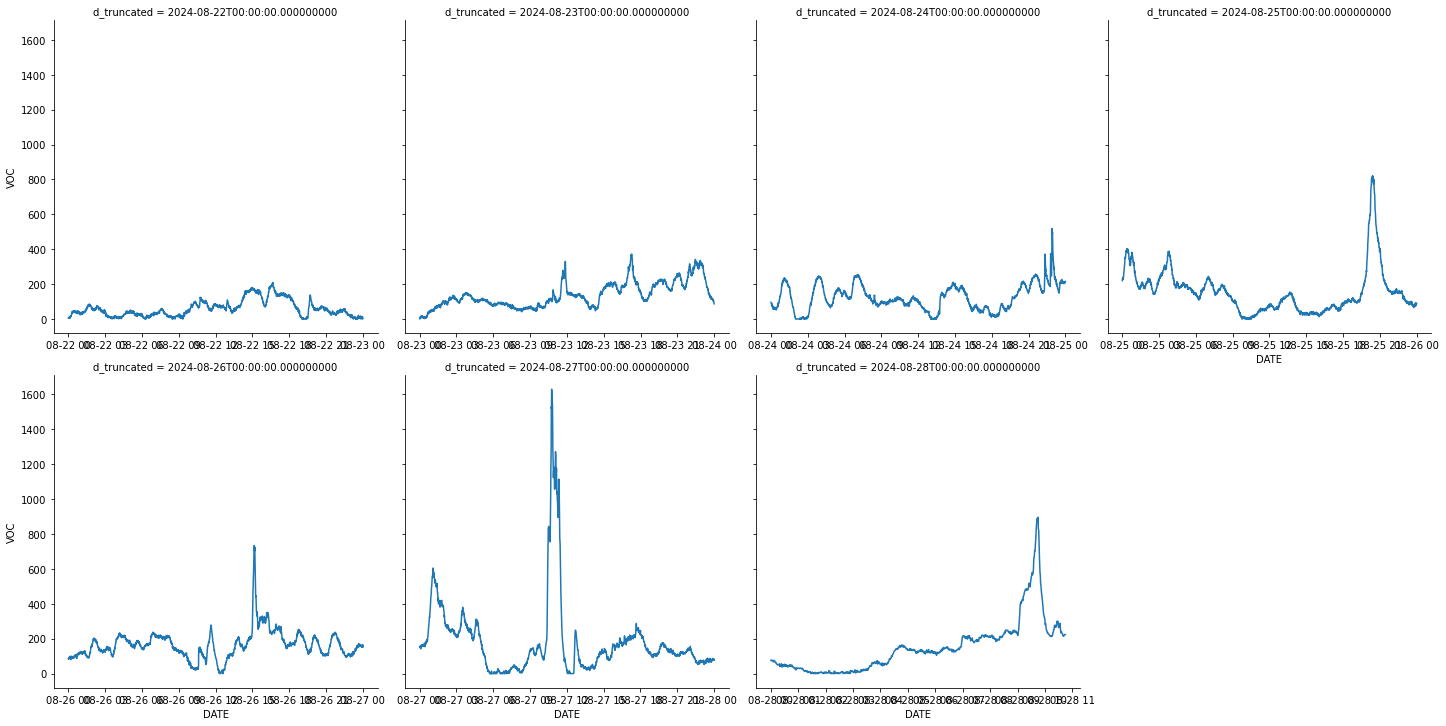

In [46]:
g = sns.relplot(
    data=unit0, kind='line',
    x='DATE', y='VOC', col='d_truncated',
    col_wrap=4,
    facet_kws=dict(sharex=False),
)

# g.fig.autofmt_xdate() # 마지막 날짜가 이상해지는군.

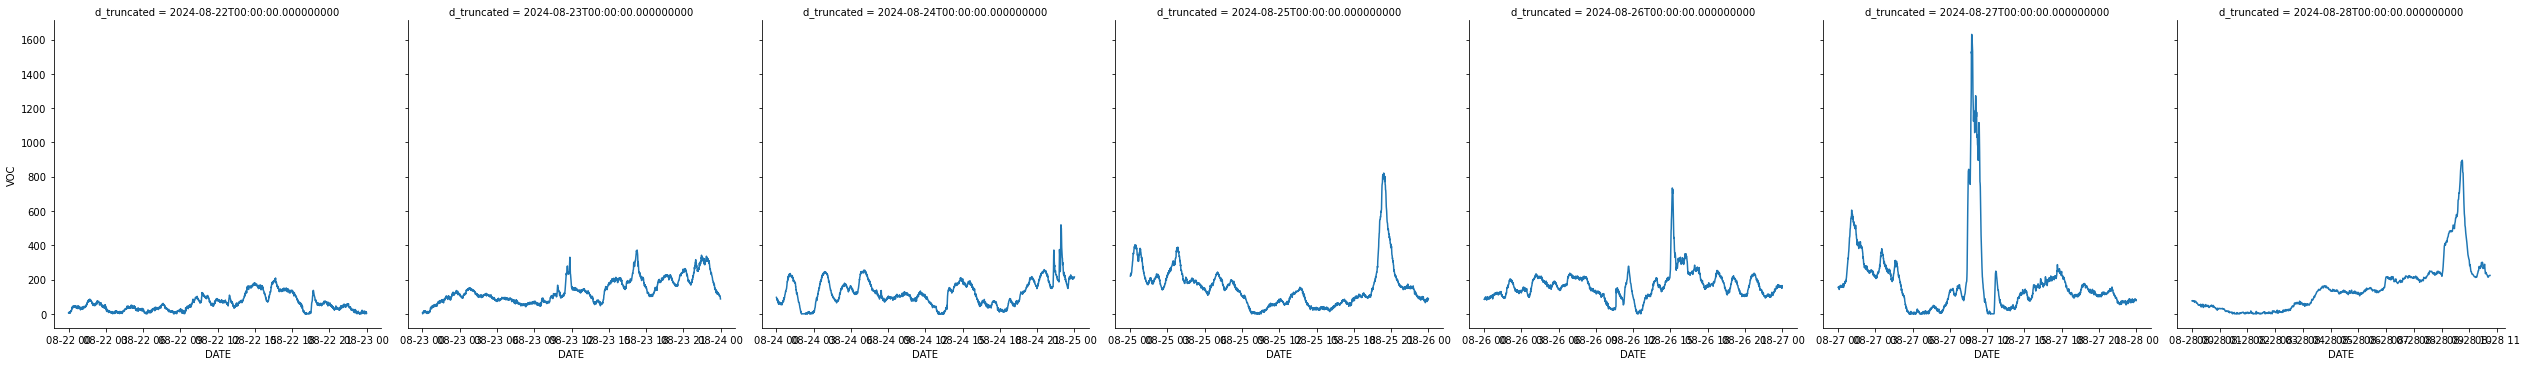

In [45]:
g = sns.relplot(
    data=unit0, kind='line',
    x='DATE', y='VOC', col='d_truncated',
#     col_wrap=3,
    facet_kws=dict(sharex=False),
)